In [12]:
import sys
import os

source_path = 'C:/Users/User/Desktop/Dyslexia project/Source'

if source_path not in sys.path:
    sys.path.append(source_path)
    

import data_manipulation as dm 
import data_visualization as dv
import data_processing as dp
from sklearn.model_selection import train_test_split

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly as pl
from model_test import Test

In [14]:
from sklearn.model_selection import StratifiedKFold

In [15]:
from sklearn.cluster import KMeans
from fcmeans import FCM

In [29]:
data = dm.read_data('reduced_data.xlsx')
data.head()

,ID,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,S0995,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9,1
1,S0996,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9,1
2,S0997,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8,1
3,S1000,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8,1
4,S1001,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9,1


In [30]:
features = data.drop(['Dysgraphia', 'ID'], axis = 1)
features.head()

,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age
0,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9
1,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9
2,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8
3,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8
4,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9


In [31]:
y = data['Dysgraphia']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state = 0, shuffle = True, stratify = y)
X_train, y_train = pd.DataFrame(X_train, columns  = features.columns), pd.Series(y_train)
y_train.index = X_train.index

In [56]:
y_train

208    0
6      1
33     0
192    1
18     1
      ..
134    0
240    0
218    0
90     0
246    0
Name: Dysgraphia, Length: 196, dtype: int64

In [57]:
tst = Test(FCM(n_clusters = 2, random_state = 42), n_folds = 5)
scores = tst.cross_validation_scores(features, y)
scores

,Mean,STD
Accuracy,0.521429,0.110310
Recall,0.611538,0.233587
Precision,0.258618,0.102008
F1_Score,0.363036,0.140940


Accuracy: 0.44047619047619047, Recall: 0.18518518518518517, Precision: 0.16666666666666666, F1_Score: 0.17543859649122806
              precision    recall  f1-score   support

           0       0.59      0.56      0.58        57
           1       0.17      0.19      0.18        27

    accuracy                           0.44        84
   macro avg       0.38      0.37      0.38        84
weighted avg       0.46      0.44      0.45        84



FCM(n_clusters=2, max_iter=150, m=2.0, error=1e-05, random_state=42, trained=True, rng=Generator(PCG64) at 0x1F1FF559D60, u=array([[0.10745211, 0.89254789],
       [0.09404791, 0.90595209],
       [0.73527092, 0.26472908],
       [0.23730017, 0.76269983],
       [0.89601627, 0.10398373],
       [0.84299771, 0.15700229],
       [0.79917641, 0.20082359],
       [0.77893504, 0.22106496],
       [0.84196386, 0.15803614],
       [0.39430549, 0.60569451],
       [0.7488624 , 0.2511376 ],
       [0.86721648, 0.13278352],
       [0.45253091, 0.54746909],
       [0.8065494 , 0.1934506 ],
       [0.85395066, 0.14604934],
       [0.83078416, 0.16921584],
       [0.74071567, 0.25928433],
       [0.7761058 , 0.2238942 ],
       [0.27163773, 0.72836227],
       [0.07398335, 0.92601665],
       [0.48571205, 0.51428795],
       [0.79536368, 0.20463632],
       [0.77618461, 0.22381539],
       [0.93938035, 0.06061965],
       [0.80040083, 0.19959917],
       [0.81919184, 0.18080816],
       [0.61496529

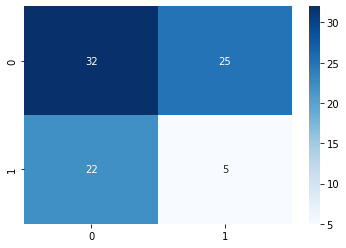

In [67]:
tst.train_test_report(features[: 196].values, y[: 196], features[196:].values, y[196:], supervised = False)